In [87]:
# Tools 
import numpy as np 
import pandas as pd 

# Visualization 
import seaborn as sns 
import matplotlib.pyplot as plt
import umap

# Sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score

## Data 

Primero carguemos y leamos los datos 

In [42]:
ds = pd.read_csv("./DryBeanDataset/Dry_Bean_Dataset.arff", skiprows=25, header=None)
names_columns = ["Area", "Perimeter", "Major axis length", "Minor axis length", "Aspect ratio", "Eccentricity",
                "Convex area", "Equivalent diameter", "Extent", "Solidity", "Roundness", "Compactness", "ShapeFactor1",
                "ShapeFactor2", "ShapeFactor3", "ShapeFactor4", "Class"]
ds.columns = names_columns
classes    = ds["Class"].unique()
print("Clases:",  classes)
ds.head()

Clases: ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


,Area,Perimeter,Major axis length,Minor axis length,Aspect ratio,Eccentricity,Convex area,Equivalent diameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Examinemos si hay datos faltantes, la cantidad de observaciones de cada clase, la eexistencia de datos atípicos y la corrleación entre las características. 

In [35]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 13611 non-null  int64  
 1   Perimeter            13611 non-null  float64
 2   Major axis length    13611 non-null  float64
 3   Minor axis length    13611 non-null  float64
 4   Aspect ratio         13611 non-null  float64
 5   Eccentricity         13611 non-null  float64
 6   Convex area          13611 non-null  int64  
 7   Equivalent diameter  13611 non-null  float64
 8   Extent               13611 non-null  float64
 9   Solidity             13611 non-null  float64
 10  Roundness            13611 non-null  float64
 11  Compactness          13611 non-null  float64
 12  ShapeFactor1         13611 non-null  float64
 13  ShapeFactor2         13611 non-null  float64
 14  ShapeFactor3         13611 non-null  float64
 15  ShapeFactor4         13611 non-null 

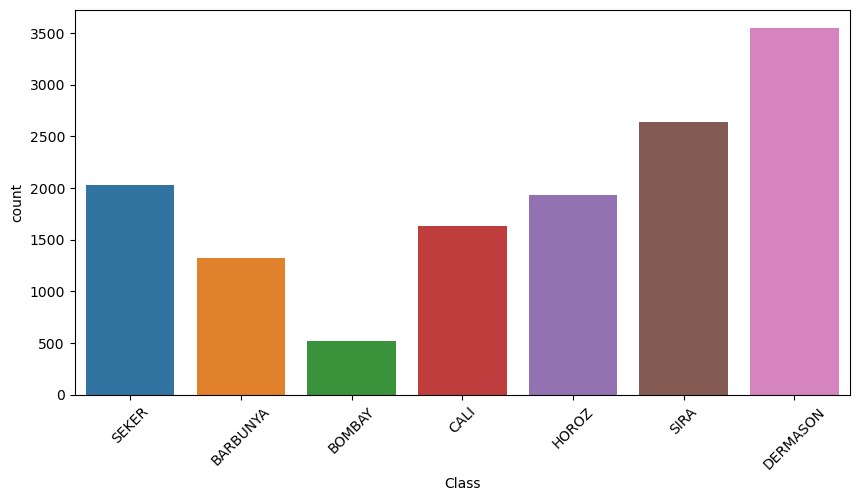

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(ds, x="Class")
plt.xticks(rotation=45)
plt.show()

le = LabelEncoder()
ds["Class"] = le.fit_transform(ds["Class"])
names = le.classes_
print(names)

Veamos que las clases están desbalanceadas 

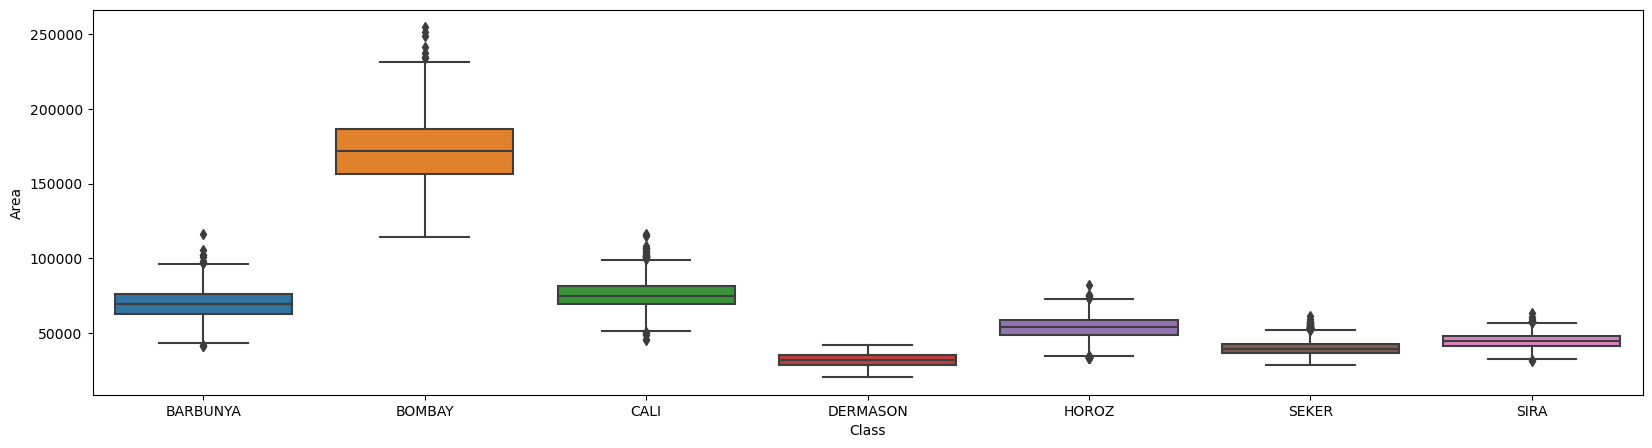

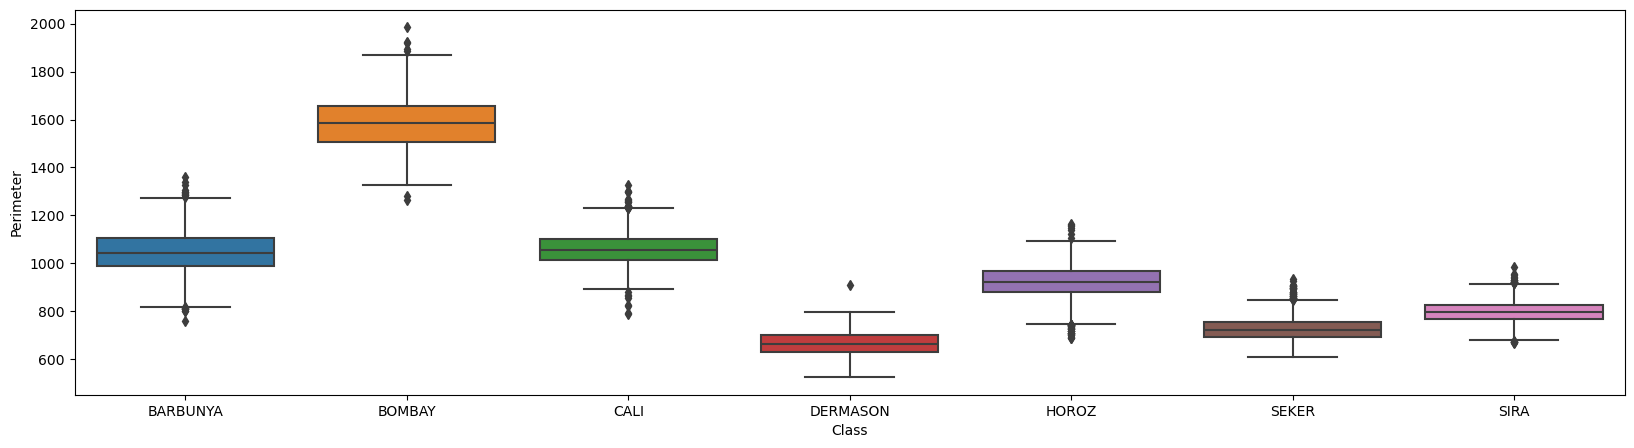

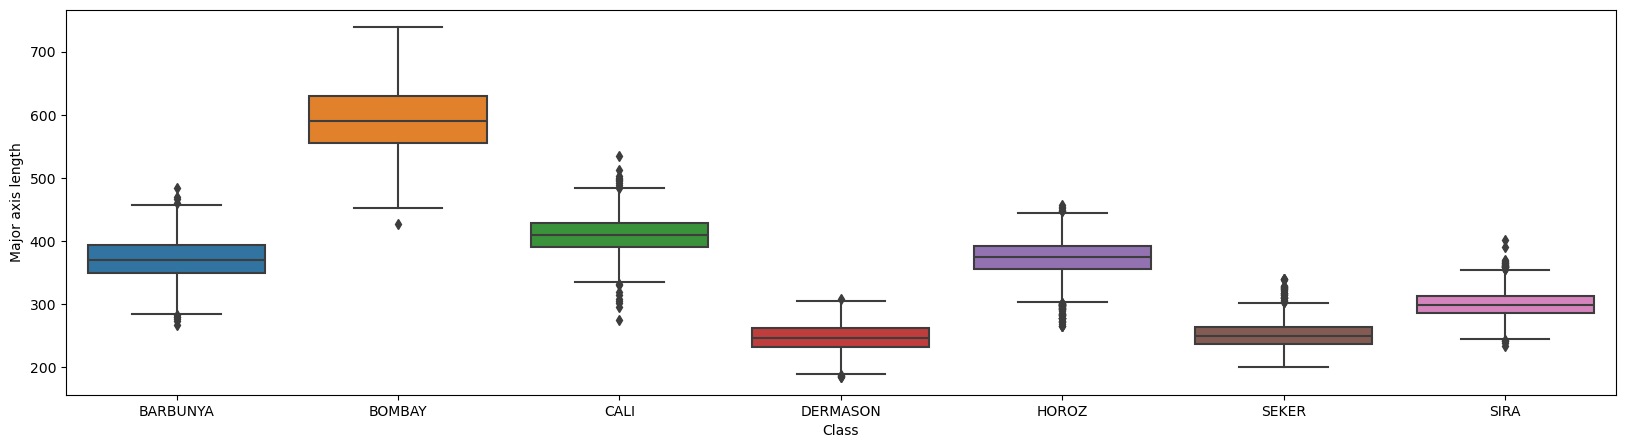

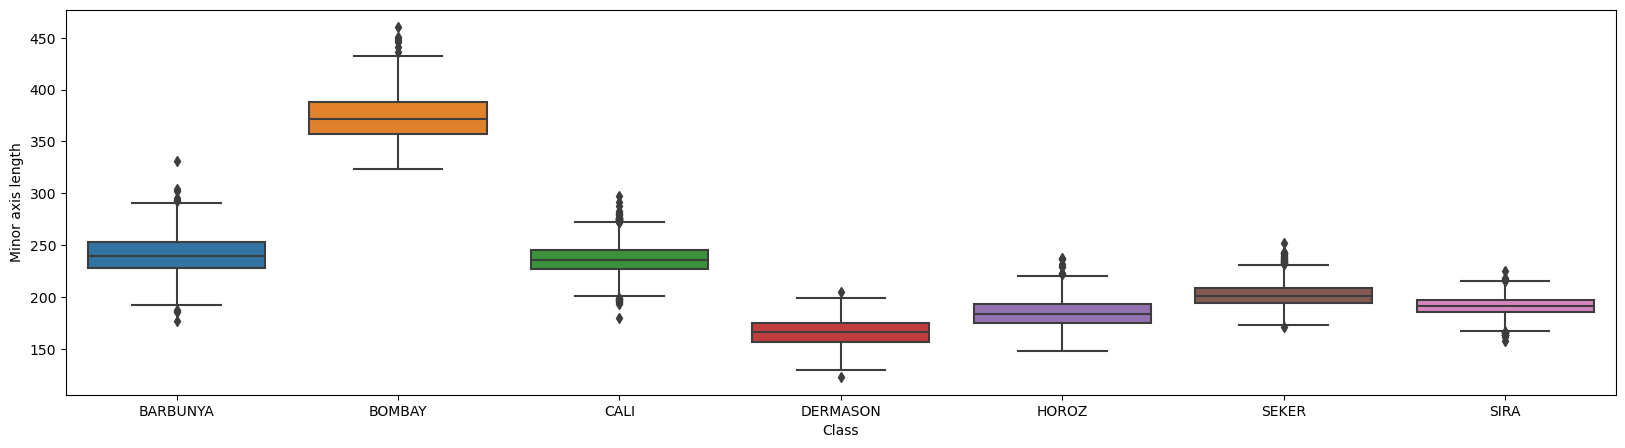

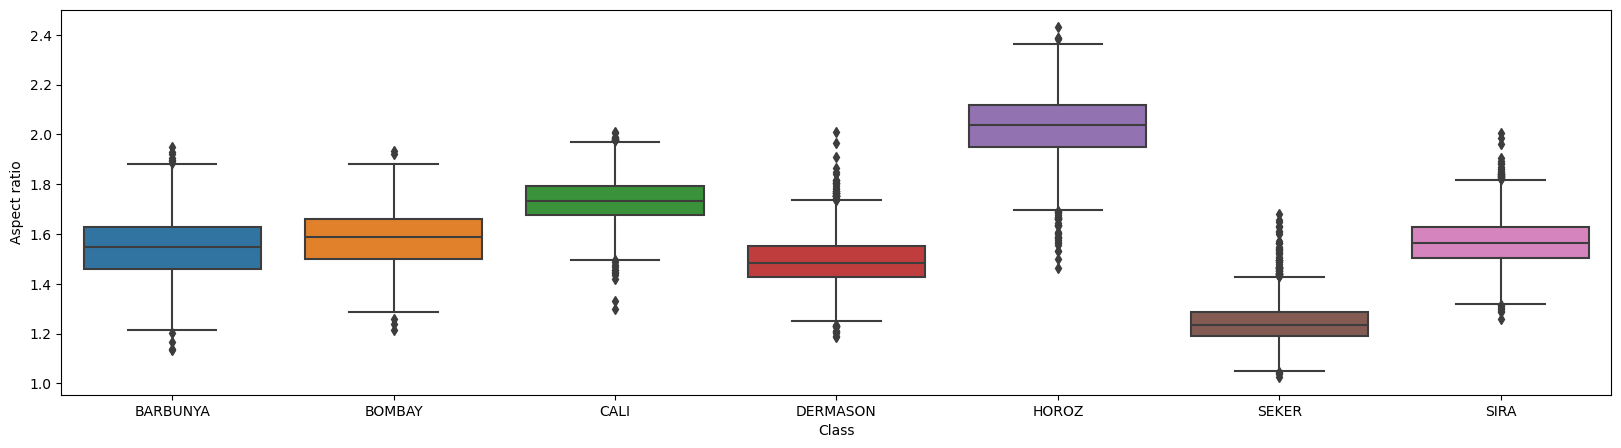

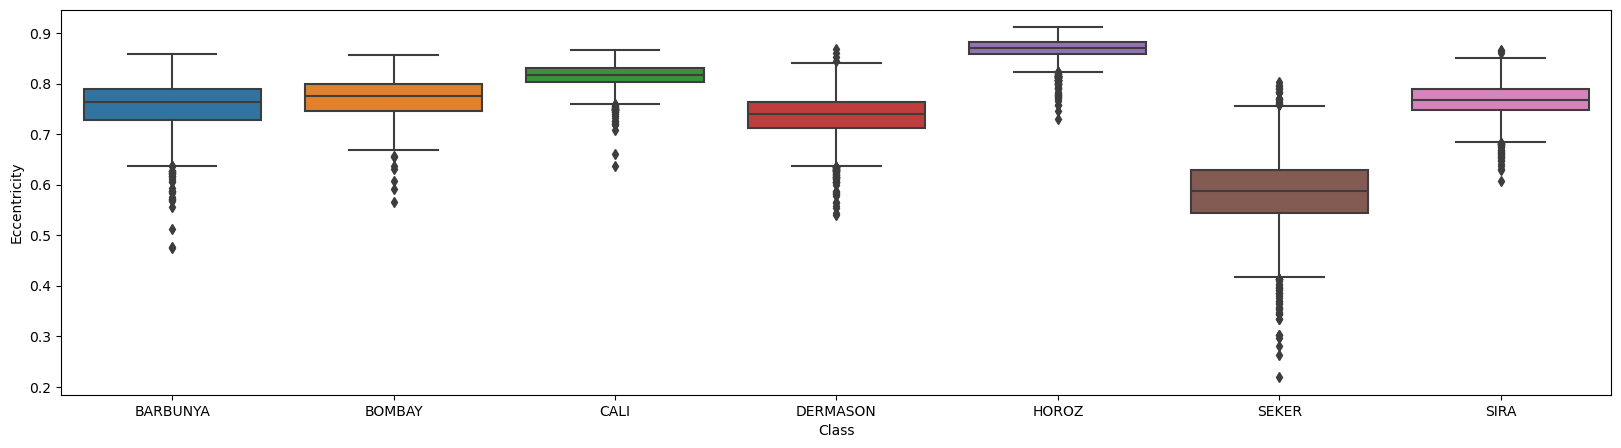

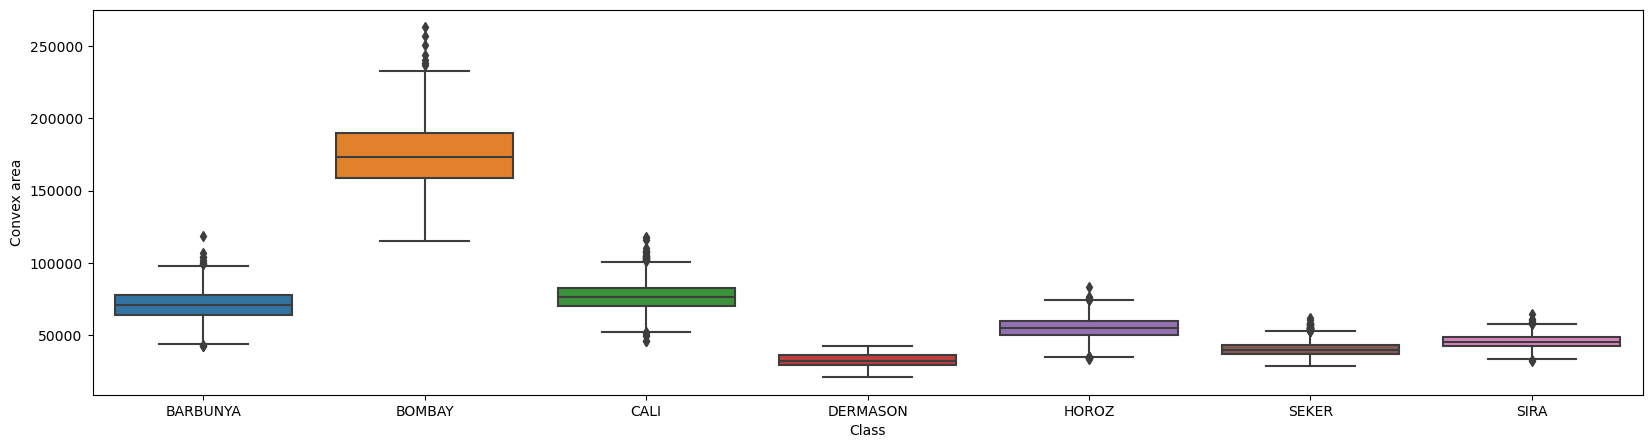

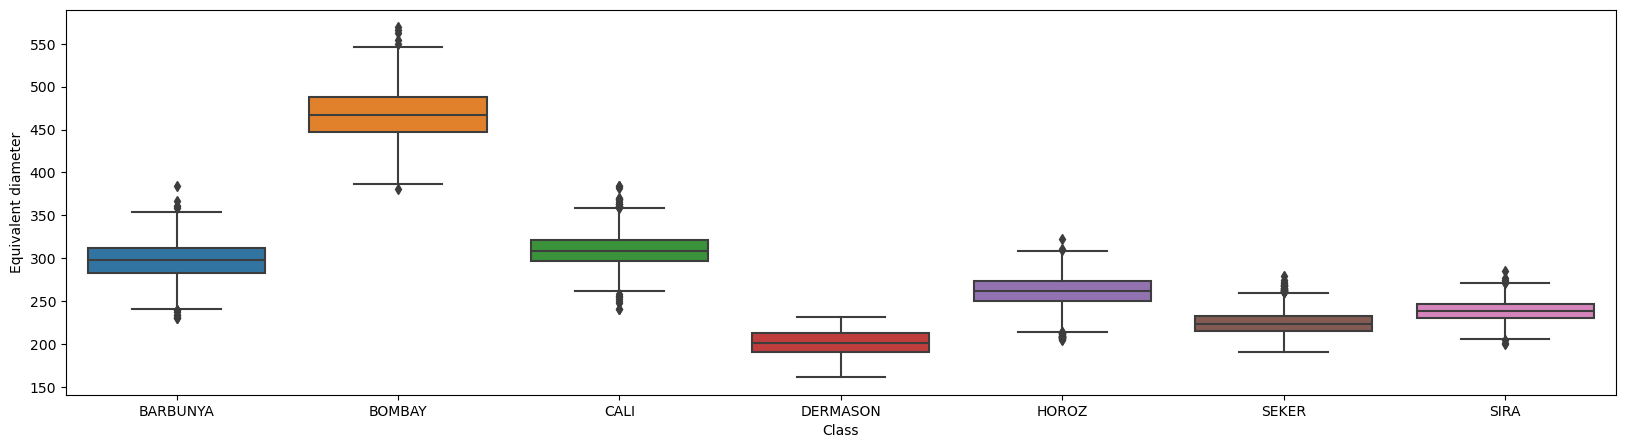

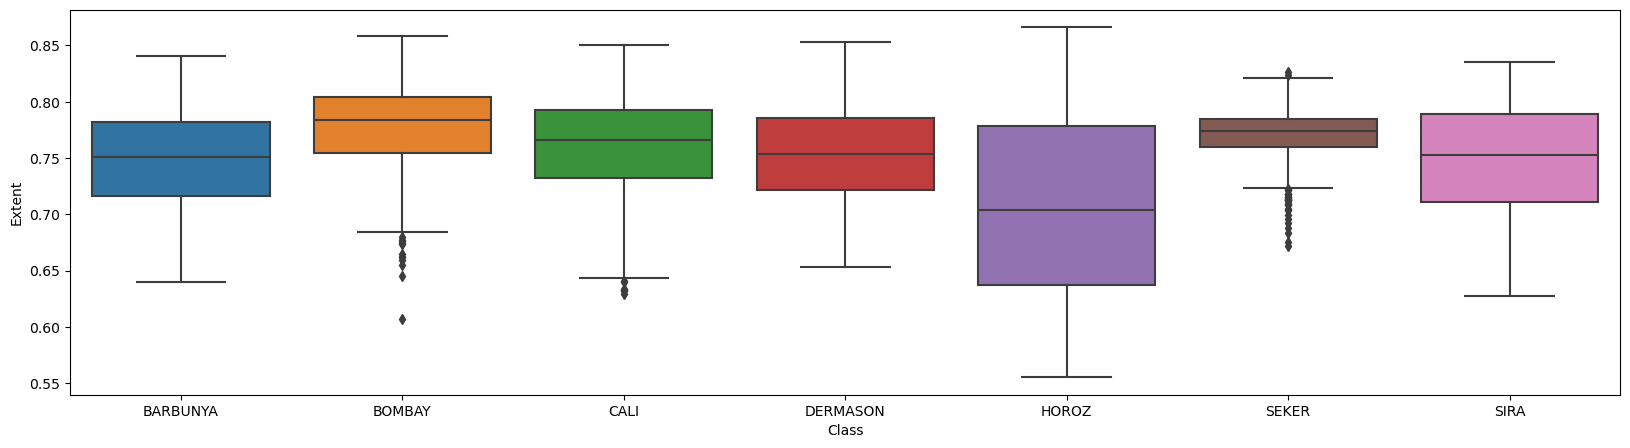

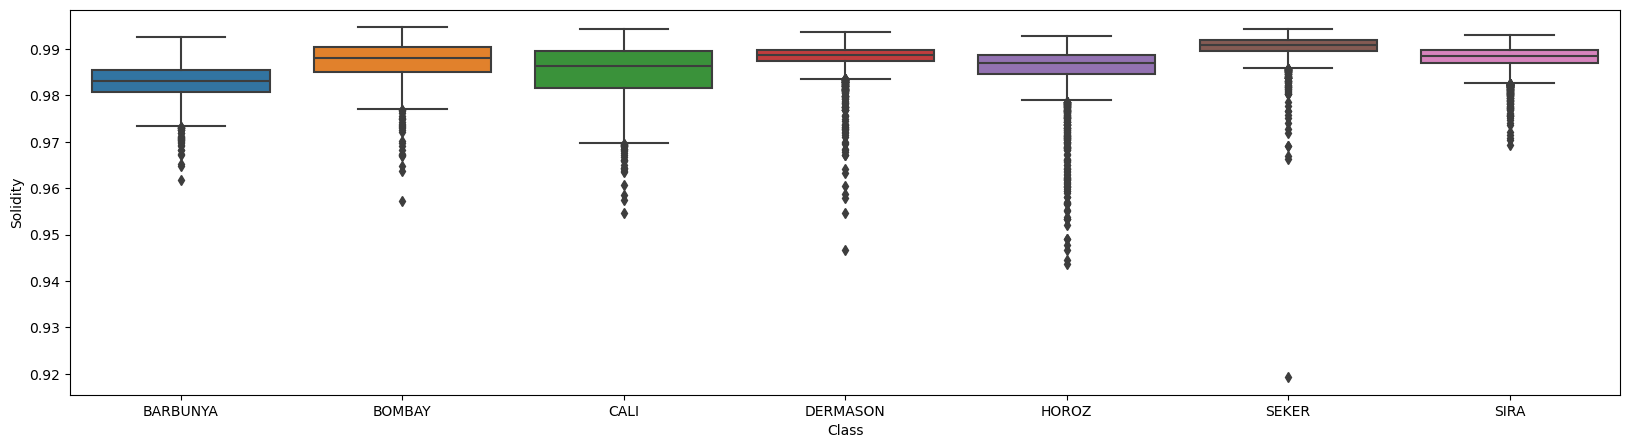

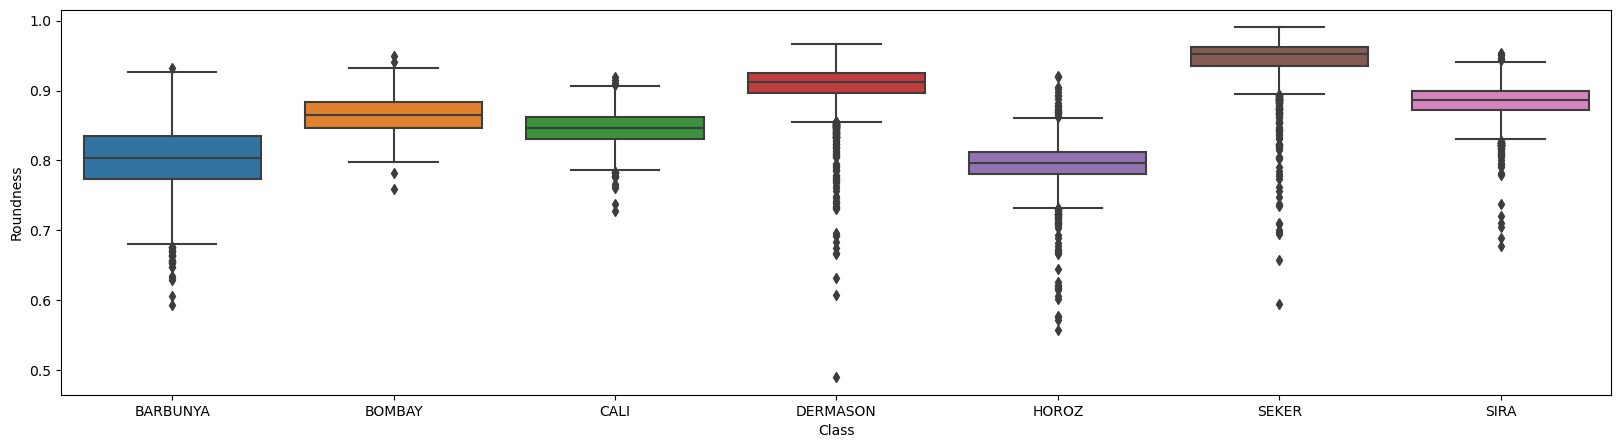

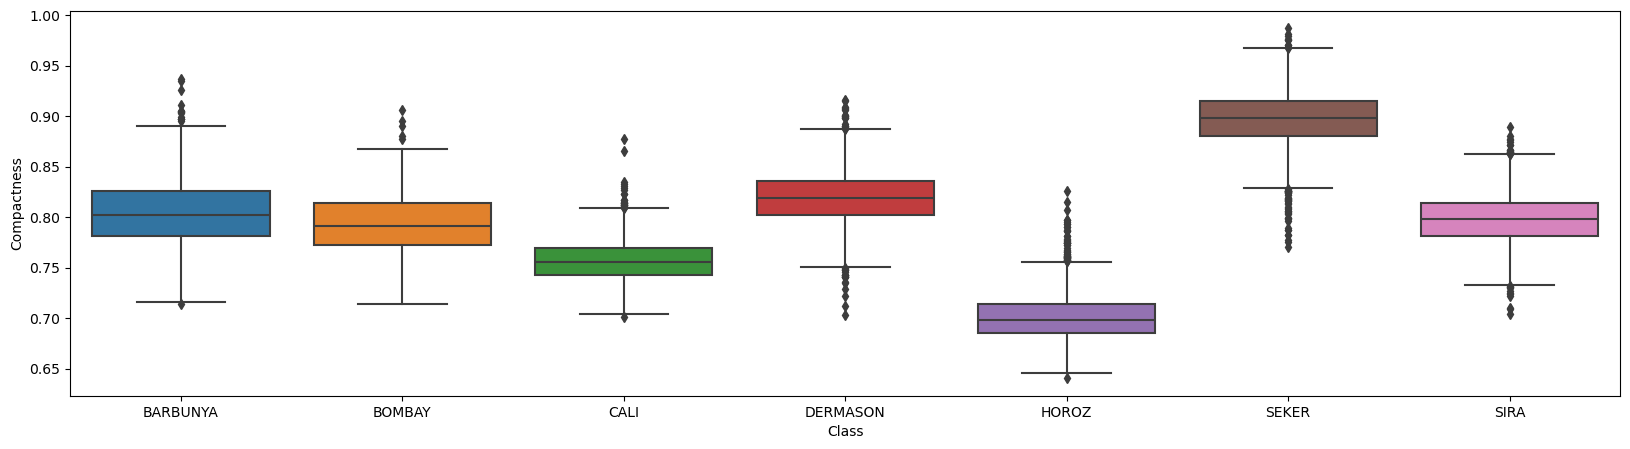

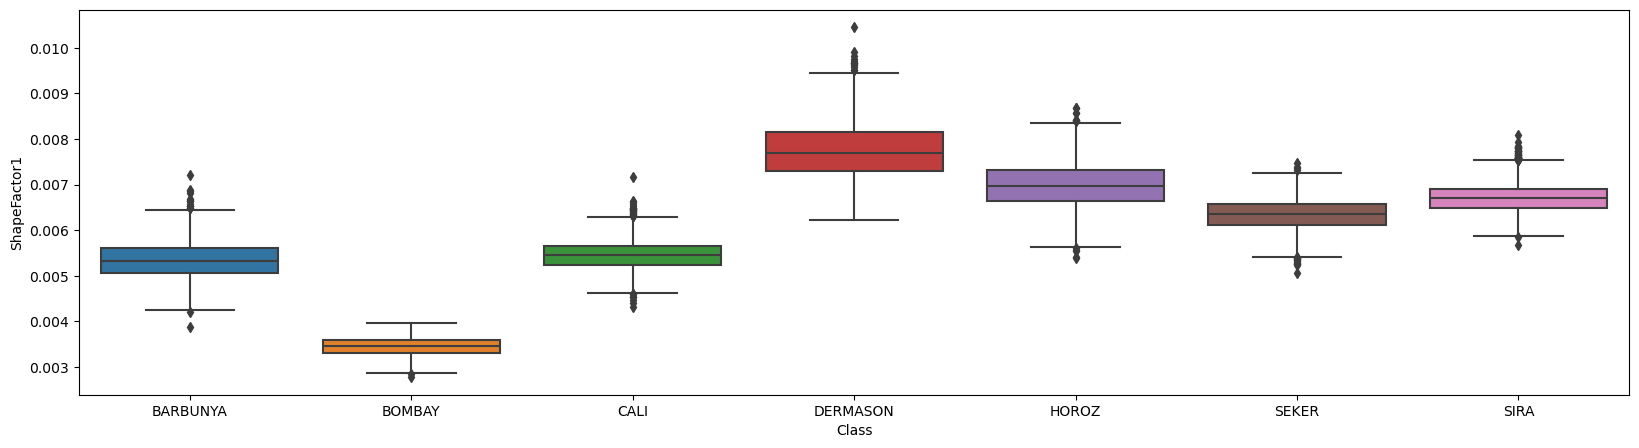

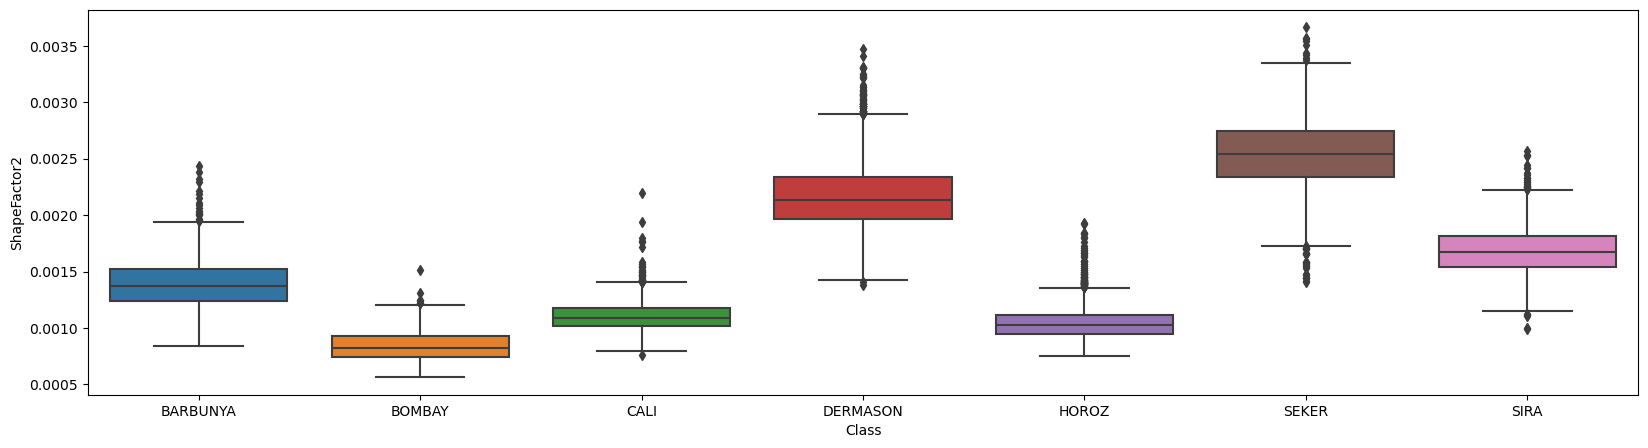

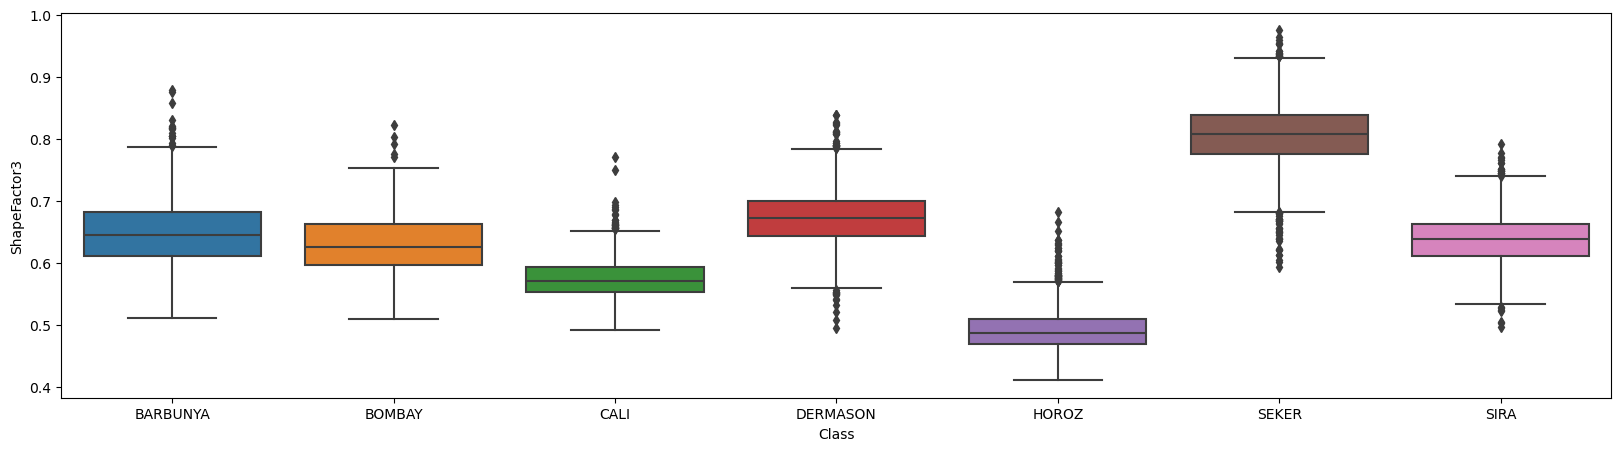

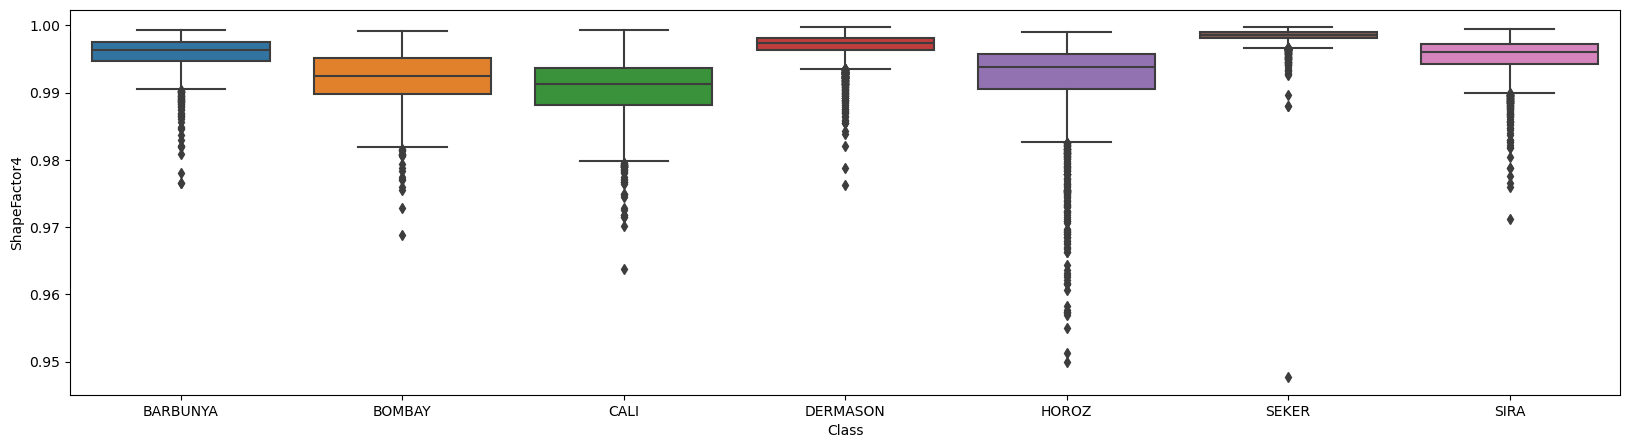

In [48]:
for feature in names_columns[:-1]:
    plt.figure(figsize=(20, 5))
    sns.boxplot(x = ds["Class"], y = ds[feature])
    plt.xticks(ticks=np.arange(len(names)), labels=names)
plt.show()

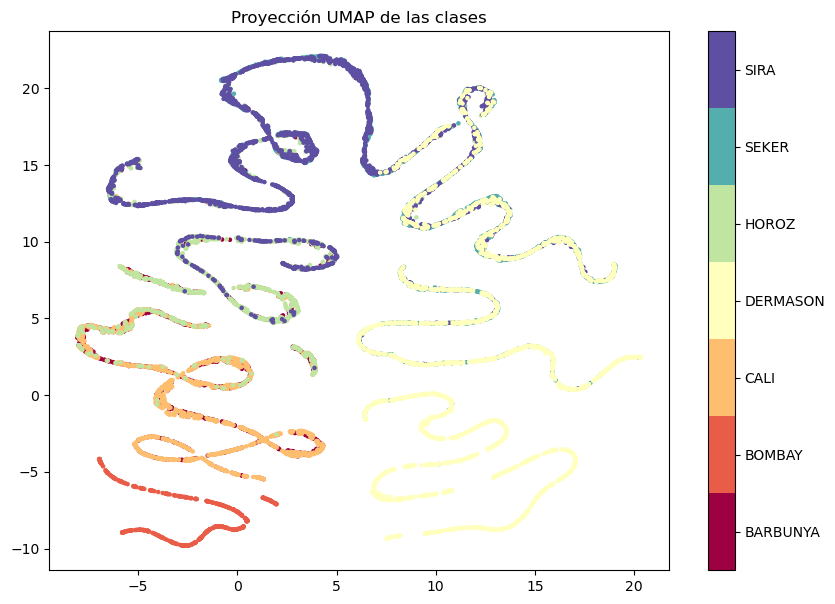

In [60]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding  = umap_model.fit_transform(ds)

plt.figure(figsize=(10, 7))
plt.scatter(embedding[:, 0], embedding[:, 1], c=ds["Class"], cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(8)-0.5).set_ticks(ticks=np.arange(7), labels=names)
plt.title('Proyección UMAP de las clases')
plt.show()

Logistic Regression 

Accuracy: 0.93


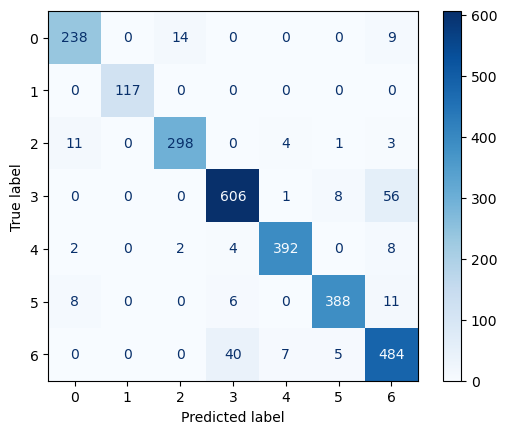

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       261
           1       1.00      1.00      1.00       117
           2       0.95      0.94      0.94       317
           3       0.92      0.90      0.91       671
           4       0.97      0.96      0.97       408
           5       0.97      0.94      0.95       413
           6       0.85      0.90      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [82]:
X, y = ds.drop(columns="Class"), ds["Class"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model 
model = LogisticRegression(max_iter=1500)
model.fit(X_train, y_train)

# Predict 
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confussion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

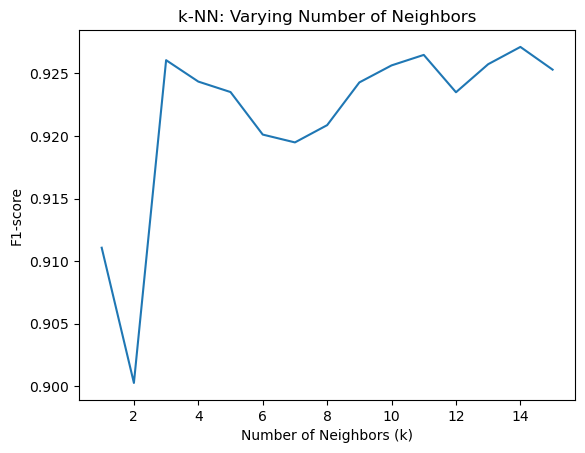

In [89]:
# Testing from 1 to 15 neighbors
metric = []
for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    metric.append(f1_score(y_test, y_pred, average='weighted'))

# Plot results
plt.plot(range(1, 16), metric)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1-score')
plt.title('k-NN: Varying Number of Neighbors')
plt.show()


F1 score: 0.93


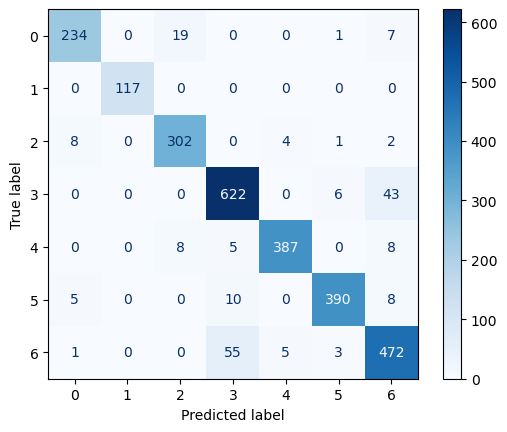

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       261
           1       1.00      1.00      1.00       117
           2       0.92      0.95      0.93       317
           3       0.90      0.93      0.91       671
           4       0.98      0.95      0.96       408
           5       0.97      0.94      0.96       413
           6       0.87      0.88      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [91]:
# Choose 1-NN 
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

# Predict 
y_pred = knn.predict(X_test)
accuracy = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score: {accuracy:.2f}')

# Confussion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)